<a href="https://colab.research.google.com/github/Lancerty/tkintermultipleregressiongui/blob/main/Multiple_Regression_Implemented_through_Tkinter_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Regression Implemented through Tkinter GUI**

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("marketingdata.csv")

In [6]:
data.head

<bound method NDFrame.head of            Date  Week  Week_ID  Month  Month_ID    Year   Day_Name  Visitors  \
0      09/11/20  46.0     34.0   11.0      11.0  2020.0     Monday     707.0   
1      10/11/20  46.0     34.0   11.0      11.0  2020.0    Tuesday    1455.0   
2      11/11/20  46.0     34.0   11.0      11.0  2020.0  Wednesday    1520.0   
3      12/11/20  46.0     34.0   11.0      11.0  2020.0   Thursday    1726.0   
4    13/11/2020  46.0     34.0   11.0      11.0  2020.0     Friday    2134.0   
..          ...   ...      ...    ...       ...     ...        ...       ...   
180    08/05/21  19.0     60.0    5.0      17.0  2021.0   Saturday    1483.0   
181    09/05/21  20.0     61.0    5.0      17.0  2021.0     Sunday    1303.0   
182    10/05/21   NaN      NaN    NaN       NaN     NaN        NaN       NaN   
183    11/05/21   NaN      NaN    NaN       NaN     NaN        NaN       NaN   
184    12/05/21   NaN      NaN    NaN       NaN     NaN        NaN       NaN   

     Reve

**Data Pre-Processing**

In [7]:
data.dropna(inplace=True) #drops the empty rows

In [8]:
data.fillna(method='ffill', inplace=True)  # Forward fill
data.fillna(method='bfill', inplace=True)  # Backward fill

In [ ]:
from scipy import stats

# Define the name of the specific column you want to process
column_name = 'Marketing Spend'

# Calculate Z-scores for the specified column
z_scores = np.abs(stats.zscore(data[column_name]))

# Define a threshold to identify outliers (e.g., Z-score > 3)
threshold = 3

# Create a mask of outliers for the specified column
outliers = (z_scores > threshold)

# Remove rows with outliers in the specified column
cleaned_df = data[~outliers]

**Correlation Matrix**

<ipython-input-9-587246815207>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


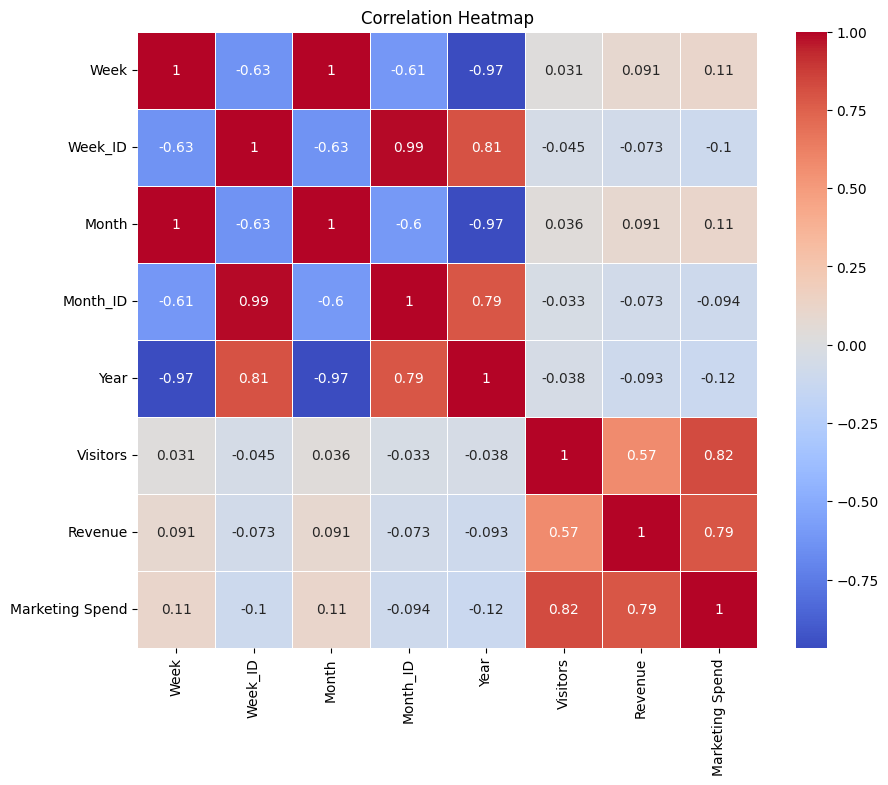

In [9]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Regression Model**

In [10]:
X = data[['Marketing Spend','Visitors' ]]  # Independent variables
y = data['Revenue']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 2722.890147885366
MSE: 14476895.252362823
RMSE: 3804.8515414353324
R-squared: 0.5147039131053925


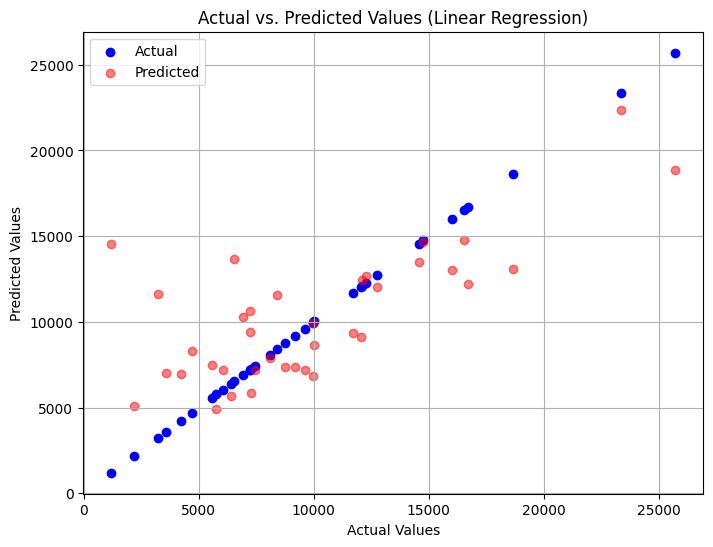

In [22]:
plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()